# A Microvan e o Desafio da Segmentação de Mercado
**Este projeto foi criado por Ricardo Paiva.**


**Motivação**

Uma empresa que deseja lançar um novo produto costuma realizar pesquisas para entender com mais precisão as necessidades e os desejos dos clientes. Essas informações são fundamentais para orientar as estratégias de marketing no momento do lançamento.

No entanto, questionários que geram dezenas ou até centenas de variáveis podem ser desafiadores de analisar, especialmente quando o objetivo é identificar grupos de clientes com características semelhantes. É nesse contexto que o PCA (Análise de Componentes Principais) se torna uma ferramenta valiosa: ele reduz a dimensionalidade dos dados, tornando mais fácil interpretar os resultados e aplicar técnicas de clusterização de forma eficiente.

Esse tipo de abordagem não se limita a um único setor — é altamente aplicável em diversas áreas da economia!

**Objeto de Estudo**

A Empresa esta desenvolvendo um novo conceito de veículo — uma microvan, que é maior que um SUV, porém mais compacta que uma minivan. Nosso objetivo é identificar qual é o público ideal para direcionar as primeiras campanhas de marketing.

O principal método para identificar tendências e preferências dos consumidores é por meio de pesquisa primária, que geralmente começa com grupos focais e evolui para pesquisas de média e grande escala. Esse processo tem, basicamente, dois objetivos principais:

    Entender os desejos e necessidades de um determinado grupo ou nicho de consumidores.

    Aliar essas informações aos dados demográficos para traçar o perfil de quem demonstrou interesse no conceito da microvan desenvolvida pela Empresa.

As principais perguntas de negócio que buscamos responder são:

    Qual é o segmento-alvo ideal para esse novo veículo?

    Quais são as principais necessidades e desejos desse público?

Para isso, a Empresa conduziu vários grupos focais com potenciais compradores do novo conceito de microvan — um veículo maior que um SUV, mas mais compacto que uma minivan. A equipe de marketing também avaliou uma ampla lista de atributos que poderiam ser relevantes para os consumidores, além de declarações relacionadas a estilo de vida, todas validadas por pesquisas anteriores no setor automotivo.

A partir das anotações feitas durante os grupos focais, foi definido um conjunto de 30 atributos considerados fundamentais, além de variáveis demográficas importantes. O objetivo é usar esses atributos para compreender as principais dimensões que caracterizam os potenciais compradores e, a partir disso, segmentar o mercado para direcionar as campanhas de marketing.

Como parte do estudo, também foi apresentado um protótipo do carro, e os participantes foram convidados a avaliar seu grau de interesse em uma escala de 1 a 9.

No entanto, utilizar diretamente esses 30 atributos em uma análise de clusterização geraria resultados pouco claros e difíceis de interpretar. Para resolver esse problema, aplicamos a técnica de PCA (Análise de Componentes Principais), que permite reduzir a dimensionalidade dos dados, agrupando variáveis que compartilham padrões de variância semelhantes. Isso facilita a interpretação e torna a análise mais eficiente.

O PCA, por si só, já permite observar agrupamentos naturais de perfis de respostas. No entanto, a avaliação da homogeneidade dentro dos grupos é feita de forma mais precisa através da clusterização, aplicada sobre os componentes principais resultantes do PCA.

Esse tipo de abordagem é extremamente útil e aplicável em diversos setores além da indústria automotiva, como bancos, telecomunicações, varejo e qualquer empresa que ofereça serviços e possua bases de dados sobre seus clientes. A análise de questionários combinada com redução de dimensionalidade via PCA se mostra uma ferramenta poderosa para entender melhor o comportamento dos consumidores e aprimorar estratégias de segmentação.

    Este estudo de caso real — “Grosse Pointe Associates and The Microvan” — está disponível no excelente livro “Modern Marketing Research: Concepts, Methods, and Cases”, ISBN 1133188966.

## 1. Importando Bibliotecas e Configurando Pandas

In [1]:
# importando as bibliotecas para leitura dos dados e criação de gráficos
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import plotly.express as px

# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 2. Análise Exploratória de Dados

### 2.1. Dicionário de Dados

- **mvliking:** Apresenta o quanto o(a) potencial cliente gostou do conceito da microvan.
- **kidtrans:** Precisamos de um carro que ajude a transportar nossos filhos os seus amigos.
- **miniboxy:** As minivans atuais são simplesmente muito quadradas e grandes.
- **lthrbetr:** Os assentos de couro são muito melhores que os de tecido.
- **secbiggr:** Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão.
- **safeimpt:** A segurança do automóvel é muito importante para mim.
- **buyhghnd:** Nós tendemos a comprar carros mais sofisticados.
- **pricqual:** Os preços dos automóveis refletem fortemente a qualidade de produção subjacente.
- **prmsound:** Um sistema de som e entretenimento premium ajuda em longas viagens de carro.
- **perfimpt:** O desempenho é muito importante em um carro.
- **tkvacatn:** Tentamos tirar o máximo de férias possível.
- **noparkrm:** Nossa residência atual não tem muito espaço de estacionamento.
- **homlrgst:** Nossa casa está entre as maiores do bairro.
- **envrminr:** O impacto ambiental dos automóveis é relativamente pequeno.
- **needbetw:** Precisa haver algo entre um sedan e uma minivan.
- **suvcmpct:** Gosto mais de SUVs do que de minivans, pois são mais compactos.
- **next2str:** Meu próximo carro será um de dois lugares.
- **carefmny:** Temos cuidado com o dinheiro.
- **shdcarpl:** Acho que todo mundo deveria pegar carona ou usar transporte público.
- **imprtapp:** A maioria dos nossos aparelhos são importados.
- **lk4whldr:** A tração nas quatro rodas é uma opção muito atraente.
- **kidsbulk:** Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles.
- **wntguzlr:** Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”.
- **nordtrps:** Não fazemos viagens com a família
- **stylclth:** Nós tendemos a comprar roupas elegantes para a família.
- **strngwrn:** A proteção da garantia precisa ser forte em um carro novo.
- **passnimp:** A paixão pelo trabalho é mais importante do que o pagamento.
- **twoincom:** Nossa família acharia difícil subsistir com apenas uma renda.
- **nohummer:** Não estou interessado em possuir um veículo como um Hummer.
- **aftrschl:** Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias.
- **accesfun:** Os acessórios realmente tornam o carro mais divertido de dirigir.
- **age:** Idade do entrevistado em anos
- **income:** Renda familiar anual em milhares de dólares
- **miles:** Valor anual total conduzido por membros da família em milhares de milhas
- **numkids:** Número de crianças (0-18 anos) que residem no domicílio
- **female:** Se o entrevistado é ou não uma mulher
- **educ:** Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)
- **recycle:** Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)

## 2.2. Leirura

In [2]:
# Ler os dados da microvan.
df_microvan = pd.read_csv('./data/microvan.csv')
df_microvan.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [3]:
df_microvan.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

In [4]:
# transformando coluna "subjnumb" em index.
df_microvan = df_microvan.set_index('subjnumb')
df_microvan.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [5]:
# Criar um dicionário para facilitar a consulta.
dicionario_dados = dict()

dicionario_dados['kidtrans'] = 'Precisamos de um carro que ajude a transportar nossos filhos os seus amigos'
dicionario_dados['miniboxy'] = 'As minivans atuais são simplesmente muito quadradas e grandes'
dicionario_dados['lthrbetr'] = 'Os assentos de couro são muito melhores que os de tecido'
dicionario_dados['secbiggr'] = 'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'
dicionario_dados['safeimpt'] = 'A segurança do automóvel é muito importante para mim'
dicionario_dados['buyhghnd'] = 'Nós tendemos a comprar carros mais sofisticados'
dicionario_dados['pricqual'] = 'Os preços dos automóveis refletem fortemente a qualidade de produção subjacente'
dicionario_dados['prmsound'] = 'Um sistema de som e entretenimento premium ajuda em longas viagens de carro'
dicionario_dados['perfimpt'] = 'O desempenho é muito importante em um carro'
dicionario_dados['tkvacatn'] = 'Tentamos tirar o máximo de férias possível'
dicionario_dados['noparkrm'] = 'Nossa residência atual não tem muito espaço de estacionamento'
dicionario_dados['homlrgst'] = 'Nossa casa está entre as maiores do bairro'
dicionario_dados['envrminr'] = 'O impacto ambiental dos automóveis é relativamente pequeno'
dicionario_dados['needbetw'] = 'Precisa haver algo entre um sedan e uma minivan'
dicionario_dados['suvcmpct'] = 'Gosto mais de SUVs do que de minivans, pois são mais compactos'
dicionario_dados['next2str'] = 'Meu próximo carro será um de dois lugares'
dicionario_dados['carefmny'] = 'Temos cuidado com o dinheiro'
dicionario_dados['shdcarpl'] = 'Acho que todo mundo deveria pegar carona ou usar transporte público'
dicionario_dados['imprtapp'] = 'A maioria dos nossos aparelhos são importados'
dicionario_dados['lk4whldr'] = 'A tração nas quatro rodas é uma opção muito atraente'
dicionario_dados['kidsbulk'] = 'Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles'
dicionario_dados['wntguzlr'] = 'Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”'
dicionario_dados['nordtrps'] = 'Não fazemos viagens com a família'
dicionario_dados['stylclth'] = 'Nós tendemos a comprar roupas elegantes para a família'
dicionario_dados['strngwrn'] = 'A proteção da garantia precisa ser forte em um carro novo'
dicionario_dados['passnimp'] = 'A paixão pelo trabalho é mais importante do que o pagamento'
dicionario_dados['twoincom'] = 'Nossa família acharia difícil subsistir com apenas uma renda'
dicionario_dados['nohummer'] = 'Não estou interessado em possuir um veículo como um Hummer'
dicionario_dados['aftrschl'] = 'Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias'
dicionario_dados['accesfun'] = 'Os acessórios realmente tornam o carro mais divertido de dirigir'
dicionario_dados['age'] = 'Idade do entrevistado em anos'
dicionario_dados['income'] = 'Renda familiar anual em milhares de dólares'
dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
dicionario_dados['numkids'] = 'Número de crianças (0-18 anos) que residem no domicílio'
dicionario_dados['female'] = 'Se o entrevistado é ou não uma mulher'
dicionario_dados['educ'] = 'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'
dicionario_dados['recycle'] = 'Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)'


In [6]:
# Testar consulta.

dicionario_dados['age'],  dicionario_dados['homlrgst']

('Idade do entrevistado em anos', 'Nossa casa está entre as maiores do bairro')

In [7]:
# Avaliando a quantidade de linhas e colunas
df_microvan.shape

(400, 38)

In [8]:
# Avaliando os tipos
df_microvan.dtypes

mvliking    int64
kidtrans    int64
miniboxy    int64
lthrbetr    int64
secbiggr    int64
safeimpt    int64
buyhghnd    int64
pricqual    int64
prmsound    int64
perfimpt    int64
tkvacatn    int64
noparkrm    int64
homlrgst    int64
envrminr    int64
needbetw    int64
suvcmpct    int64
next2str    int64
carefmny    int64
shdcarpl    int64
imprtapp    int64
lk4whldr    int64
kidsbulk    int64
wntguzlr    int64
nordtrps    int64
stylclth    int64
strngwrn    int64
passnimp    int64
twoincom    int64
nohummer    int64
aftrschl    int64
accesfun    int64
age         int64
income      int64
miles       int64
numkids     int64
female      int64
educ        int64
recycle     int64
dtype: object

In [9]:
df_microvan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wntguzl

## 3. Estatística descritiva

Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando. 

In [10]:
df_microvan.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


## 4. Redução de Dimensionalidade com PCA!

Reduzir a dimensionalidade utilizando análise de componentes principais (PCA)

### 4.1. Definição de Componentes
Primeiro, vamos analisar quantos componentes vamos usar (o menor número com maior variância "explicada")

In [11]:
colunas_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']
df_microvan.drop(colunas_demograficas, axis=1).head()

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4
2,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5
3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6
4,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3
5,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5


In [12]:
# Remover as colunas demograficas para deixar somente o questionário (retirar também a variável mvliking)
# O intuito é somente deixar as variáveis do questionário
colunas_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']

# Testando o número de compontentes e calculando a variância explicada de cada um
for numero_componentes in range(1, 10):
    # Classe PCA passando o número de componentes e o dataframe que vai ser reduzido
    pca = PCA(n_components=numero_componentes, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))
    print(f'{numero_componentes} componentes com variância explicada total de {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')
  


1 componentes com variância explicada total de 0.2769670987967245: [0.2769671]
2 componentes com variância explicada total de 0.4445767750017478: [0.2769671  0.16760968]
3 componentes com variância explicada total de 0.5459459552274872: [0.2769671  0.16760968 0.10136918]
4 componentes com variância explicada total de 0.6342464490894244: [0.2769671  0.16760968 0.10136918 0.08830049]
5 componentes com variância explicada total de 0.6949209280291696: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 componentes com variância explicada total de 0.7163695796236542: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 componentes com variância explicada total de 0.7356422840632016: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 componentes com variância explicada total de 0.7538737884378807: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 componentes com variância explicada total de 0.77

In [13]:
# Escolhemos o número de compontentes em 5 pela explicabilidade da variância
pca = PCA(n_components = 5, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))

f'Ou seja, com cinco componentes temos {sum(pca.explained_variance_ratio_) * 100} da variância explicada!'

'Ou seja, com cinco componentes temos 69.49209280291696 da variância explicada!'

In [14]:
df_microvan.shape

(400, 38)

## 4.2. Análise dos Componentes

Cada componente é criado como "parte" das variáveis originais. Ou seja, as variáveis originais compõe os componentes principais (lembra da projeção: o componente é a projeção dessas variáveis). Mas como saber o impacto de cada variável na projeção final? Existe um atributo no objeto PCA que mostra esses valores pra gente. 

In [15]:
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [-1.09807865e-03,  3.64988114e-01, -8.12541567e-02,
         3.38909225e-01,  2.18792400e-04,  8.27943891e-02,
        -7.97252373e-02, -6.19192696e-03, -1.47139293e-02,
        -1.17792436e-02,  3.61515356e-01, -2.99948345e-01,
        -1.51018703e-02,  3.46323846e-01,  3.61913246e-01,
        -3.38353633e-01, -6.73537198e-02, -1.41603682e-02,
        -7.29399128e-03, -7.47233603e-03,  5.49026164e-

Vamos demonstrar que essa matriz numérica representa, na verdade, a contribuição de cada componente em relação às variáveis originais. Além disso, vamos apresentar graficamente os pesos (ou cargas) de cada variável na formação dos componentes.

In [16]:
df_composicao_componentes = pd.DataFrame(columns=df_microvan.drop(colunas_demograficas, axis=1).columns)

for i in range(5):
    df_composicao_componentes.loc[i] = pca.components_[i]

df_composicao_componentes

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,-0.00,0.36,-0.08,0.34,0.00,0.08,-0.08,-0.01,-0.01,-0.01,0.36,-0.30,-0.02,0.35,0.36,-0.34,-0.07,-0.01,-0.01,-0.01,0.01,0.01,-0.04,0.11,-0.13,-0.01,0.06,0.32,-0.05,-0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,-0.31,0.07,-0.03,-0.04,0.44,0.06,0.02,0.01,-0.42,-0.04,0.00,0.00,-0.11,0.05,-0.05,-0.07,-0.01,0.13,0.02,0.42,-0.25,-0.05,0.26,-0.03,0.34,0.11,0.08,0.02,-0.18,-0.07
4,0.13,-0.03,-0.08,0.07,0.03,-0.30,-0.42,-0.08,-0.08,0.05,-0.11,0.07,-0.41,-0.02,0.04,-0.17,0.09,0.42,0.07,0.03,0.12,-0.29,-0.16,0.04,-0.03,0.03,-0.39,-0.03,0.02,-0.01


In [17]:
# Calculo para cada componente

for i in range(5):
    coluna_maior = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmax()]
    coluna_menor = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmin()]
    
    print(f'Componente {i+1} impacto positivo: "{dicionario_dados[coluna_maior]}" e impacto negativo: "{dicionario_dados[coluna_menor]}"\n\n')

Componente 1 impacto positivo: "Temos cuidado com o dinheiro" e impacto negativo: "Tentamos tirar o máximo de férias possível"


Componente 2 impacto positivo: "As minivans atuais são simplesmente muito quadradas e grandes" e impacto negativo: "Meu próximo carro será um de dois lugares"


Componente 3 impacto positivo: "Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias" e impacto negativo: "Não fazemos viagens com a família"


Componente 4 impacto positivo: "A segurança do automóvel é muito importante para mim" e impacto negativo: "O desempenho é muito importante em um carro"


Componente 5 impacto positivo: "Acho que todo mundo deveria pegar carona ou usar transporte público" e impacto negativo: "Os preços dos automóveis refletem fortemente a qualidade de produção subjacente"




### 4.3. Analisando graficamente os pesos de cada variável nos componentes principais</a>

In [18]:
dicionario_dados['envrminr']

'O impacto ambiental dos automóveis é relativamente pequeno'

<Axes: >

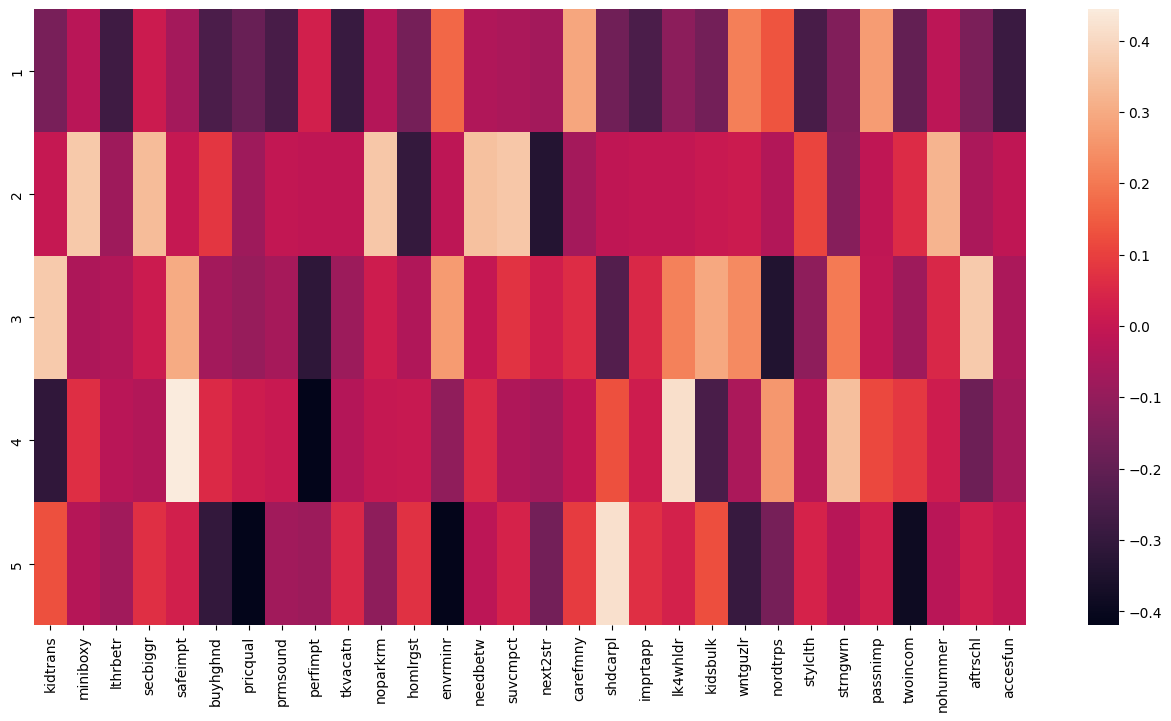

In [19]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.heatmap(data=df_composicao_componentes, yticklabels=df_composicao_componentes.index+1)

Para facilitar o entendimento posterior e termos um nome mais mnemônico que somente componente 1, 2; podemos criar "nomes" para os componentes de acordo com suas características. Isso vai ser útil quando fizermos análise de aglomerados mais à frente!

- Componente 1: **Avarento sem férias!**
- Componente 2: **Gostamos de carros apertados!**
- Componente 3: **Família é o que interessa!**
- Componente 4: **Carro com melhor desempenho!**
- Componente 5: **Pago caro por carro bom e não ligo para poluição!**

Embora os nomes e brincadeiras sejam parte do processo, é fundamental compreender as características dos componentes para fundamentar as estratégias de marketing. Esse entendimento permite identificar quais variáveis possuem comportamentos semelhantes, o que, em questionários, contribui para agrupar de forma mais precisa aquelas que realmente são mais próximas entre si.. 

In [20]:
# transformar nosso dataframe original com os componentes que criamos.
componentes_principais_microvan = pca.transform(df_microvan.drop(colunas_demograficas, axis=1))
componentes_principais_microvan


array([[ 4.95739724,  0.630778  ,  0.25397408, -4.53413096, -0.4787577 ],
       [-0.42529226,  4.57730748, -2.68257259,  2.62292284,  0.50422577],
       [-4.20223653, -5.99835902,  2.46455968, -1.54782301,  2.41202492],
       ...,
       [-6.4115679 ,  4.47822563, -6.6555251 ,  0.29161379,  1.62472682],
       [-3.57270499,  5.5292335 ,  0.25267482, -2.61167859,  1.04362801],
       [ 4.05034892, -2.45977589,  3.75878157,  0.49039215, -0.74268315]],
      shape=(400, 5))

## 5. Clusterização - KMeans

Na primeira etapa, realizamos a redução da dimensionalidade do questionário, pois aplicar um cluster diretamente sobre 30 variáveis tornaria a interpretação dos grupos bastante complexa. Por isso, utilizamos a clusterização com base nos componentes principais, em vez das variáveis originais do questionário. Dessa forma, reduzimos de 30 para apenas 5 variáveis, o que facilita significativamente a compreensão dos resultados do agrupamento.

In [21]:
# Lembrando que temos o questionário "transformado" em 5 componentes principais
# Cada linha desse array é um cliente que respondeu o questionário, com os valores de cada um dos 5 componentes
componentes_principais_microvan

array([[ 4.95739724,  0.630778  ,  0.25397408, -4.53413096, -0.4787577 ],
       [-0.42529226,  4.57730748, -2.68257259,  2.62292284,  0.50422577],
       [-4.20223653, -5.99835902,  2.46455968, -1.54782301,  2.41202492],
       ...,
       [-6.4115679 ,  4.47822563, -6.6555251 ,  0.29161379,  1.62472682],
       [-3.57270499,  5.5292335 ,  0.25267482, -2.61167859,  1.04362801],
       [ 4.05034892, -2.45977589,  3.75878157,  0.49039215, -0.74268315]],
      shape=(400, 5))

#### Ex: a linha 1 é um cliente que respondeu o questionário e tem o componente principal 1 no valor de 4,9, ou seja, um valor forte positivo para "_Avarento sem férias_" e valor 4,5 para "_Carro com melhor desempenho_" :)

In [22]:
# Agora que temos os componentes, vamos apensar as colunas nos clientes para termos os dados completos
# Primeiro, transformando o array em dataframe para incluir os nomes certos dos componentes
nomes_componentes = ['avarento', 'apertados', 'familia', 'desempenho', 'carro_caro']

df_componentes_principais_microvan = pd.DataFrame(componentes_principais_microvan, columns = nomes_componentes, index=df_microvan.index)
df_componentes_principais_microvan.head()

,avarento,apertados,familia,desempenho,carro_caro
subjnumb,,,,,
1,4.96,0.63,0.25,-4.53,-0.48
2,-0.43,4.58,-2.68,2.62,0.50
3,-4.20,-6.00,2.46,-1.55,2.41
4,4.89,0.93,-0.76,3.58,-3.52
5,0.12,-5.55,-1.02,-0.07,0.84


In [23]:
# Anexar aos dados originais (sem os questionários, que já foram substituídos pelos componentes principais).
colunas_demograficas

df_completo = pd.concat([df_microvan.loc[:, colunas_demograficas], df_componentes_principais_microvan], axis=1)
df_completo.head()


,age,income,miles,numkids,female,educ,recycle,mvliking,avarento,apertados,familia,desempenho,carro_caro
subjnumb,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,0.63,0.25,-4.53,-0.48
2,36,79,16,1,0,3,4,6,-0.43,4.58,-2.68,2.62,0.50
3,51,72,22,2,1,3,3,3,-4.20,-6.00,2.46,-1.55,2.41
4,32,42,12,0,0,3,2,3,4.89,0.93,-0.76,3.58,-3.52
5,40,75,17,1,1,3,4,1,0.12,-5.55,-1.02,-0.07,0.84


### 5.1 Cluster KMeans

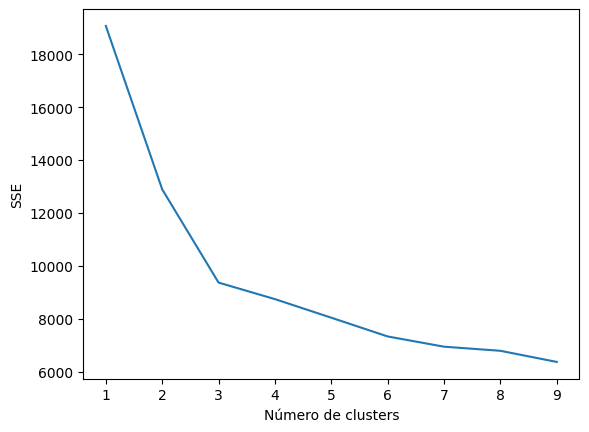

In [36]:
# Criar os clusters
from sklearn.cluster import KMeans

# Vamos utilizar a métrica SSE (Error Sum of Squares) que 
# calcula o quadrado da distância de cada ponto ao seu centróide
# e soma tudo! Ou seja, quanto mais "espalhado" os clusters estiverem, maior
# o erro (clusters juntinhos é melhor com SSE baixo)
sse = {}

# Vamos utilizar o gráfico de cotovelo utilizando a métrica SSE variando de 1 a 9 clusters
for num_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, ).fit(df_completo.loc[:, nomes_componentes])
    
    # Incluindo a informação de qual cluster cada observação pertence
    #df_completo["clusters"] = kmeans.labels_

    # Inertia: Soma das distâncias entre as observações
    # e o centro do seu cluster
    sse[num_clusters] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, max_iter=1000, ).fit(df_completo.loc[:, nomes_componentes])

# Incluindo a informação de qual cluster cada observação pertence
df_completo["clusters"] = kmeans.labels_
df_completo.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,avarento,apertados,familia,desempenho,carro_caro,clusters
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,0.63,0.25,-4.53,-0.48,1
2,36,79,16,1,0,3,4,6,-0.43,4.58,-2.68,2.62,0.50,0
3,51,72,22,2,1,3,3,3,-4.20,-6.00,2.46,-1.55,2.41,2
4,32,42,12,0,0,3,2,3,4.89,0.93,-0.76,3.58,-3.52,1
5,40,75,17,1,1,3,4,1,0.12,-5.55,-1.02,-0.07,0.84,2


In [38]:
kmeans.labels_

array([1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 2,
       0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0,
       0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2,
       0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1,
       2, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1,
       1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0,

In [39]:
# Onde será que ficaram os centróides?
kmeans.cluster_centers_

array([[-3.49014866,  3.97677834,  0.04436347,  0.06864481,  0.10576402],
       [ 4.82314353,  0.17359036,  0.26109089,  0.08413115,  0.03966391],
       [-2.91459823, -3.66666699, -0.36032683, -0.16329513, -0.14071421]])

In [40]:
df_centroides = pd.DataFrame(data=kmeans.cluster_centers_, columns=nomes_componentes)
df_centroides

,avarento,apertados,familia,desempenho,carro_caro
0,-3.49,3.98,0.04,0.07,0.11
1,4.82,0.17,0.26,0.08,0.04
2,-2.91,-3.67,-0.36,-0.16,-0.14


In [41]:
df_cluster0 = df_completo.loc[df_completo['clusters'] == 0]
df_cluster0.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,avarento,apertados,familia,desempenho,carro_caro,clusters
subjnumb,,,,,,,,,,,,,,
2,36,79,16,1,0,3,4,6,-0.43,4.58,-2.68,2.62,0.50,0
7,47,38,26,2,1,4,3,8,-3.95,4.49,2.79,0.14,0.11,0
15,52,119,28,3,1,3,3,6,-6.21,5.45,1.31,0.02,0.12,0
16,39,28,29,2,1,4,3,6,-3.66,4.64,4.12,2.77,2.56,0
17,43,113,17,0,0,4,4,9,-4.10,4.96,-5.54,2.71,-2.03,0


In [42]:
df_cluster1 = df_completo.loc[df_completo['clusters'] == 1]
df_cluster1.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,avarento,apertados,familia,desempenho,carro_caro,clusters
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,0.63,0.25,-4.53,-0.48,1
4,32,42,12,0,0,3,2,3,4.89,0.93,-0.76,3.58,-3.52,1
8,29,39,16,1,0,2,2,4,4.29,1.27,2.10,2.66,-0.53,1
10,26,26,11,0,0,2,3,3,8.11,-1.87,-1.86,1.12,0.59,1
11,31,20,12,0,1,3,3,1,5.16,2.38,2.59,3.28,-0.27,1


In [43]:
df_cluster2 = df_completo.loc[df_completo['clusters'] == 2]
df_cluster2.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,avarento,apertados,familia,desempenho,carro_caro,clusters
subjnumb,,,,,,,,,,,,,,
3,51,72,22,2,1,3,3,3,-4.20,-6.00,2.46,-1.55,2.41,2
5,40,75,17,1,1,3,4,1,0.12,-5.55,-1.02,-0.07,0.84,2
6,43,94,16,0,0,3,5,2,-3.41,-8.46,-3.38,1.64,1.34,2
9,38,129,20,1,0,3,2,5,-3.82,-4.41,-0.15,-1.17,-1.07,2
12,43,136,17,0,0,3,1,3,-2.17,-4.27,0.15,-1.24,-2.22,2


In [44]:
df_completo['clusters'].value_counts()

clusters
1    159
2    129
0    112
Name: count, dtype: int64

In [45]:
df_cluster0.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,avarento,apertados,familia,desempenho,carro_caro,clusters
count,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00
mean,44.38,83.12,22.41,1.99,0.60,3.36,3.11,6.64,-3.49,3.98,0.04,0.07,0.11,0.00
std,5.73,33.42,4.05,1.12,0.49,0.64,1.23,2.25,1.97,1.50,2.77,2.54,1.90,0.00
min,31.00,28.00,14.00,0.00,0.00,2.00,1.00,1.00,-9.12,0.23,-6.66,-6.62,-5.26,0.00
25%,40.00,59.00,19.75,1.00,0.00,3.00,2.00,5.00,-4.78,2.97,-1.76,-1.34,-0.99,0.00
50%,44.00,78.50,22.00,2.00,1.00,3.00,3.00,7.00,-3.33,4.02,0.05,0.03,0.15,0.00
75%,48.00,105.00,26.00,3.00,1.00,4.00,4.00,9.00,-2.10,5.19,2.12,1.69,1.45,0.00
max,58.00,168.00,32.00,4.00,1.00,4.00,5.00,9.00,0.72,7.18,7.07,7.18,4.86,0.00


In [46]:
df_cluster1.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,avarento,apertados,familia,desempenho,carro_caro,clusters
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,32.15,36.65,14.61,0.67,0.48,2.05,2.99,3.91,4.82,0.17,0.26,0.08,0.04,1.00
std,5.30,16.33,3.56,0.76,0.50,0.77,1.13,2.48,1.90,1.77,2.54,2.47,2.17,0.00
min,19.00,15.00,7.00,0.00,0.00,1.00,1.00,1.00,1.20,-4.33,-5.78,-5.90,-5.45,1.00
25%,28.00,25.00,12.00,0.00,0.00,1.00,2.00,2.00,3.52,-1.06,-1.47,-1.45,-1.51,1.00
50%,32.00,32.00,15.00,1.00,0.00,2.00,3.00,4.00,4.60,0.32,0.27,0.22,0.07,1.00
75%,36.00,45.00,17.00,1.00,1.00,3.00,4.00,6.00,5.97,1.24,2.05,1.79,1.50,1.00
max,48.00,131.00,24.00,4.00,1.00,3.00,5.00,9.00,10.33,5.24,6.87,5.29,5.83,1.00


In [47]:
df_cluster2.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,avarento,apertados,familia,desempenho,carro_caro,clusters
count,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00
mean,46.05,103.67,18.48,1.22,0.56,3.26,3.05,4.43,-2.91,-3.67,-0.36,-0.16,-0.14,2.00
std,5.97,43.27,3.52,0.99,0.50,0.66,1.20,2.55,1.85,1.64,2.63,2.41,2.01,0.00
min,31.00,41.00,10.00,0.00,0.00,1.00,1.00,1.00,-7.44,-8.46,-6.20,-7.34,-6.33,2.00
25%,42.00,73.00,16.00,1.00,0.00,3.00,2.00,2.00,-4.20,-4.72,-2.32,-1.55,-1.29,2.00
50%,46.00,96.00,18.00,1.00,1.00,3.00,3.00,4.00,-2.67,-3.65,-0.15,-0.33,0.03,2.00
75%,51.00,126.00,21.00,2.00,1.00,4.00,4.00,6.00,-1.72,-2.67,1.47,1.59,1.28,2.00
max,60.00,273.00,27.00,4.00,1.00,4.00,5.00,9.00,1.28,0.53,5.46,6.34,4.31,2.00


### 5.2. Vamos entender melhor os clusters 

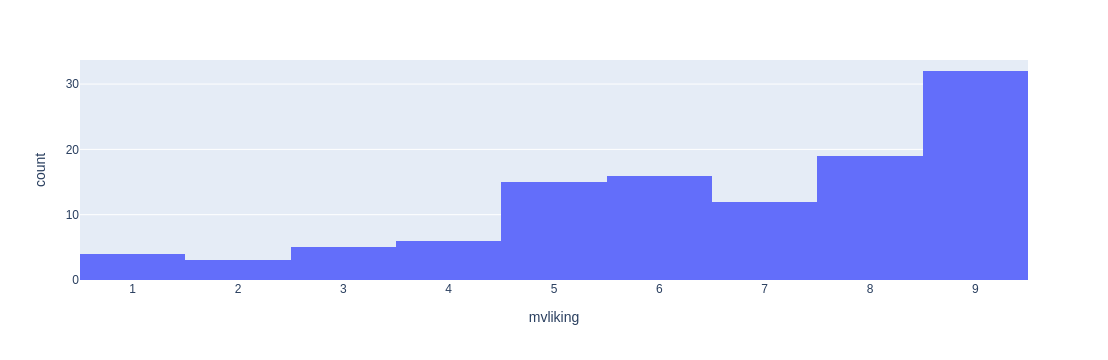

In [48]:
fig = px.histogram(data_frame=df_cluster0, x='mvliking')
fig.show()

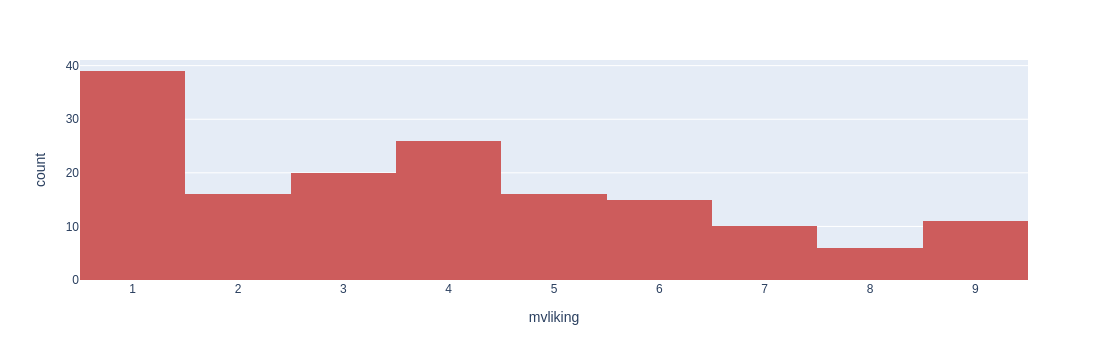

In [49]:
fig = px.histogram(data_frame=df_cluster1, x='mvliking', color_discrete_sequence=['indianred'])
fig.show()

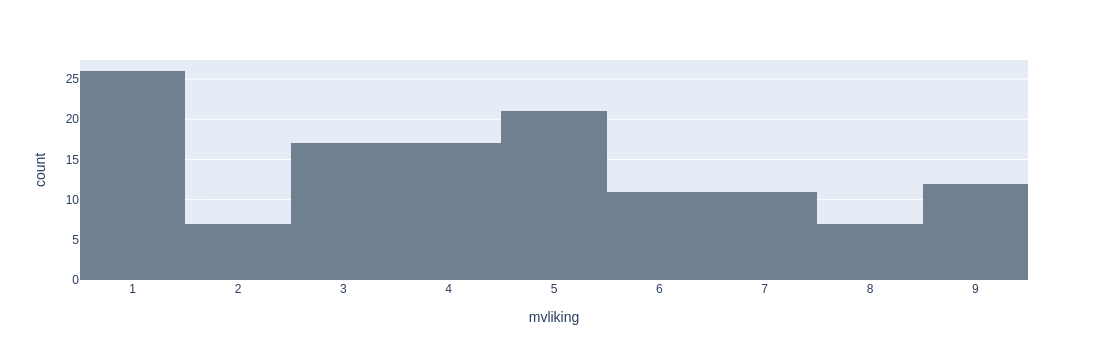

In [50]:
fig = px.histogram(data_frame=df_cluster2, x='mvliking', nbins=10, color_discrete_sequence=['slategray'])
fig.show()

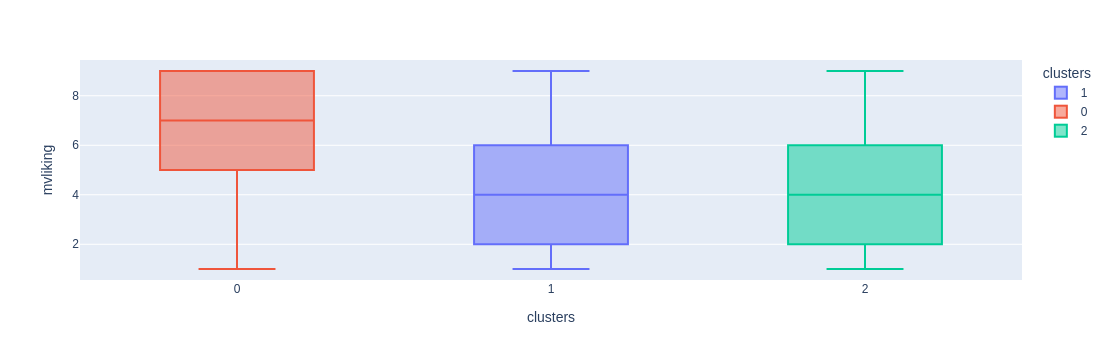

In [51]:
fig = px.box(data_frame=df_completo, x='clusters', y='mvliking', color='clusters')
fig.show()

In [52]:
# Análises demográficas
df_completo.columns

Index(['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle',
       'mvliking', 'avarento', 'apertados', 'familia', 'desempenho',
       'carro_caro', 'clusters'],
      dtype='object')

In [53]:
df_demografico = df_completo.iloc[:, :8]
df_demografico.head()

,age,income,miles,numkids,female,educ,recycle,mvliking
subjnumb,,,,,,,,
1,34,59,14,1,0,1,3,4
2,36,79,16,1,0,3,4,6
3,51,72,22,2,1,3,3,3
4,32,42,12,0,0,3,2,3
5,40,75,17,1,1,3,4,1


<Axes: >

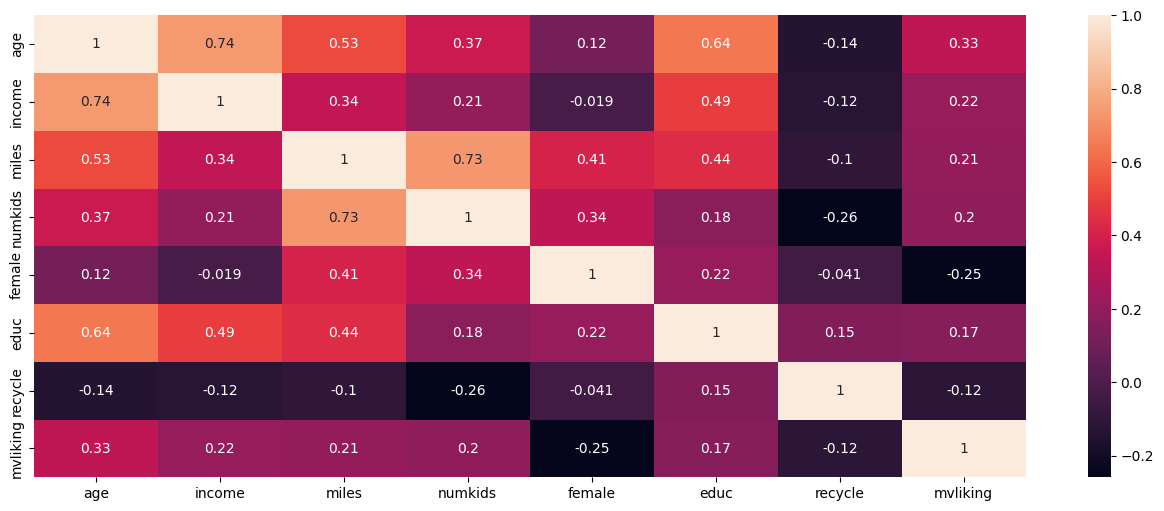

In [54]:
correlacoes_demograficas = df_demografico.corr()

plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes_demograficas, annot=True)

<Axes: xlabel='age'>

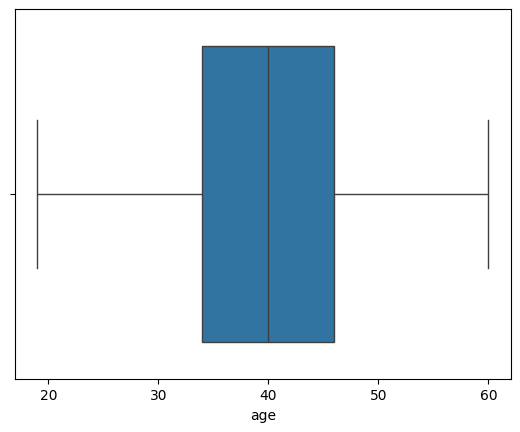

In [55]:
sns.boxplot(data=df_demografico, x='age')

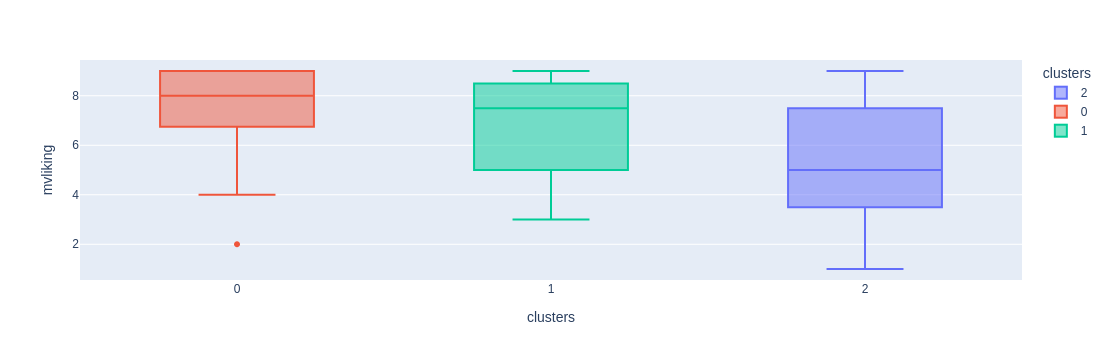

In [56]:
df1 = df_completo.loc[(df_completo['age'] >=40) & 
    (df_completo['female'] == False), :]

fig = px.box(data_frame=df1, 
             x='clusters', 
             y='mvliking', color='clusters')
fig.show()

In [57]:
100 * len(df_completo.loc[(df_completo['age'] >=40) & (df_completo['female'] == False)& (df_completo['clusters'] == 0), :]) / len(df_completo)

8.25

In [58]:
len(df_completo.loc[(df_completo['age'] >=40) & (df_completo['female'] == False)& (df_completo['clusters'] == 0), :])

33

In [59]:
df_centroides

,avarento,apertados,familia,desempenho,carro_caro
0,-3.49,3.98,0.04,0.07,0.11
1,4.82,0.17,0.26,0.08,0.04
2,-2.91,-3.67,-0.36,-0.16,-0.14


## 6. Perguntas de negócio

**1. Qual é o segmento-alvo ideal para esse novo veículo?**

O segmento-alvo ideal é composto predominantemente por indivíduos do sexo masculino, com idade superior a 40 ou 45 anos.

**2. Quais são as principais necessidades e desejos desse público?**

Esse público demonstra alta disposição para investir em veículos de maior valor e prioriza, como principal necessidade, amplo espaço interno, associado a conforto e praticidade.

## 7. Conclusão

Realizamos a segmentação dos clientes em clusters, utilizando Análise de Componentes Principais (PCA) para reduzir a quantidade de variáveis provenientes do questionário. Como resultado, identificamos um cluster com maior propensão à compra da nossa microvan.

É importante destacar que, embora possuíssemos a nota atribuída pelos clientes ao protótipo, nosso objetivo foi ir além dessa informação, buscando compreender padrões de perfil e comportamento de forma mais robusta e preditiva.

A análise das características do Cluster 0, associada aos principais componentes que o definem, proporcionou uma visão muito mais clara sobre quais perfis devem ser priorizados em campanhas de marketing. Quando combinamos essas informações com os dados demográficos, observamos que o público mais aderente a esse produto é predominantemente masculino, com idade acima de 40 a 45 anos, com alta disposição para investir em um veículo (avarento negativo) e que valoriza significativamente espaço interno (apertados negativo).

Portanto, a partir desse perfil, podemos direcionar nossas estratégias comerciais e de comunicação de maneira mais assertiva, priorizando um segmento que apresenta maior potencial de conversão.